### Set Up Birthright

In [1]:
from source.regency import Regency

Game = Regency('new')

Using TensorFlow backend.


In [2]:
Region = 'Eastern Marches'

domain='Coeranys'
Game.add_regent('EC', 'Eluvie Cariele', Class='Fighter', Alignment='CG', Regency_Bonus=2
                     , Attitude='Peaceful', Lieutenants=['Aedric Bherenstae'])
Game.add_regent('LPA', 'Life and Protection of Avanalae (Medhlorie Haensen)', Archetype='Priest', Regency_Bonus=3)
Game.add_regent('GH', 'Ghorien Hiriele (Highland/Overland Traders)', Archetype='Bandit', Alignment='CE')
Game.add_regent('Sw2', 'Second Swamp Mage', Archetype='Mage', Alignment='NG', Regency_Points=9, Gold_Bars=3)
Game.add_relationship('Sw2', 'WM', Vassalage=2)
Game.add_regent('HA', "Haelyn's Aegis (Anita Maricoere)", Archetype='Priest')
Game.add_regent('DW', "Diirk Watersold (Royal Guild of Baruk-Azhir)", Class='Rogue', Level=10, Alignment='NG', Race='Dwarf', Regency_Points=45, Gold_Bars=33)
Game.add_regent('TBM', "Three Brother Mages", Archetype='Mage')
Game.add_regent('EL', "Elamien Lamier (Points East Trading Guild)")

Game.add_relationship('LPA', 'EC', Diplomacy=3, Vassalage=1)
Game.add_relationship('EC', 'LPA', Diplomacy=3)

p = 'Bogsend'
Game.add_provence(p, domain, Region, 'EC', 1543, 1985, Population=3, Magic=2, Terrain='Swamp')
Game.add_holding(p, 'EC', 'Law', 1)
Game.add_holding(p, 'LPA', 'Temple', 1)
Game.add_holding(p, 'GH', 'Guild', 3)
Game.add_holding(p, 'Sw2', 'Source', 2)


p = 'Caudraight'
Game.add_provence(p, domain, Region, 'EC', 1556, 1914, Population=4, Magic=1)
Game.add_holding(p, 'EC', 'Law', 2)
Game.add_holding(p, 'LPA', 'Temple', 2)
Game.add_holding(p, 'HA', 'Temple', 2)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'GH', 'Guild', 2)

p = 'Deepshadow'
Game.add_provence(p, domain, Region, 'EC', 1550, 1828, Population=3, Magic=2)
Game.add_holding(p, 'EC', 'Law', 2)
Game.add_holding(p, 'LPA', 'Temple', 2)
Game.add_holding(p, 'DW', 'Guild', 3)
Game.add_holding(p, 'TBM', 'Source', 3)

p = 'Duornil'
Game.add_provence(p, domain, Region, 'EC', 1606, 1837, Population=2, Magic=3)
Game.add_holding(p, 'EC', 'Law', 2)
Game.add_holding(p, 'LPA', 'Temple', 1)
Game.add_holding(p, 'DW', 'Guild', 3)
Game.add_holding(p, 'TBM', 'Source', 2)

p = 'Mistil'
Game.add_provence(p, domain, Region, 'EC', 1662, 1966, Population=2, Magic=3, Waterway=True)
Game.add_holding(p, 'EC', 'Law', 1)
Game.add_holding(p, 'LPA', 'Temple', 2)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'TBM', 'Source', 3)

p = 'Ranien'
Game.add_provence(p, domain, Region, 'EC', 1610, 1921, Population=2, Magic=3)
Game.add_holding(p, 'EC', 'Law', 1)
Game.add_holding(p, 'LPA', 'Temple', 1)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'TBM', 'Source', 3)

p = 'Ruorven'
Game.add_provence(p, domain, Region, 'EC', 1610, 2043, Population=4, Magic=1, Terrain='Swamp', Capital=True, Waterway=True)
Game.add_holding(p, 'EC', 'Law', 3)
Game.add_holding(p, 'LPA', 'Temple', 3)
Game.add_holding(p, 'HA', 'Temple', 1)
Game.add_holding(p, 'EL', 'Guild', 2)
Game.add_holding(p, 'DW', 'Guild', 2)

Game.add_geo('Deepshadow', 'Duornil', Border=1)
Game.add_geo('Caudraight', 'Duornil', Border=1)
Game.add_geo('Deepshadow', 'Caudraight', Border=1)
Game.add_geo('Caudraight', 'Ranien', Border=1)
Game.add_geo('Caudraight', 'Bogsend', Border=1)
Game.add_geo('Mistil', 'Ranien', Border=1)
Game.add_geo('Mistil', 'Ruorven', Border=1)
Game.add_geo('Bogsend', 'Ruorven', Border=1)
Game.add_geo('Bogsend', 'Ranien', Border=1)
Game.add_geo('Ranien', 'Ruorven', Border=1)
Game.add_geo('Ranien', 'Duornil', Border=1)

domain='Osoerde'

Game.add_geo('Brothendar', 'Algael', Border=1)
Game.add_geo('Brothendar', 'Ghalliere', Border=1)
Game.add_geo('Brothendar', 'Gulfport', Border=1)
Game.add_geo('Moergen', 'Ghalliere', Border=1)
Game.add_geo('Moergen', 'Gulfport', Border=1)
Game.add_geo('Moriel', 'Ghalliere', Border=1)
Game.add_geo('Moriel', 'Gulfport', Border=1)
Game.add_geo('Moriel', 'Brothendar', Border=1)
Game.add_geo('Moriel', 'Moergen', Border=1)
Game.add_geo('Spiritsend', 'Algael', Border=1)
Game.add_geo('Spiritsend', 'Gulfport', Border=1)
Game.add_geo('Spiritsend', 'Brothendar', Border=1)
Game.add_geo('Spiritsend', 'Moriel', Border=1)
Game.add_geo('Sunken Lands', 'Gulfport', Border=1)
Game.add_geo('Sunken Lands', 'Moergen', Border=1, RiverChasm=1)

Game.add_geo('Sunken Lands', 'Bogsend', Border=1, RiverChasm=1)
Game.add_geo('Bogsend', 'Moergen', Border=1, RiverChasm=1)
Game.add_geo('Sunken Lands', 'Ruorven', Border=1, RiverChasm=1)

Game.add_regent('JR', 'Jaison Raenech', Class='Fighter', Level=7, Alignment='LE', Regency_Bonus=3
                     , Attitude='Aggressive', Lieutenants=['Terence Gryphon'])
Game.add_regent('WM', 'Willaim Moergen', Class='Fighter', Level=5, Alignment='CG', Regency_Bonus=3)
Game.add_regent('IHH', 'Impregnable Heart of Haelyn (Hubaere Armeindin)', Archetype='Priest')
Game.add_regent('Sw', 'Swamp Mage', Archetype='Mage')
Game.add_regent('CSH', "Church of Storm's End", Archetype='Priest')
Game.add_regent('TCV', 'One True Church of Vosgaard', Archetype='Priest')

Game.add_relationship('JR', 'WM', Diplomacy=-2)
Game.add_relationship('WM', 'JR', Diplomacy=-3)

p = 'Algael'
Game.add_provence(p, domain, Region, 'JR', 1355, 2226, Population=2, Magic=3, Terrain='Swamp')
Game.add_holding(p, 'JR', 'Law', 2)
Game.add_holding(p, 'IHH', 'Temple', 2)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'Sw', 'Source', 3)

p = 'Brothendar'
Game.add_provence(p, domain, Region, 'JR', 1377, 2177, Population=3, Magic=2)
Game.add_holding(p, 'JR', 'Law', 3)
Game.add_holding(p, 'CSH', 'Temple', 3)
Game.add_holding(p, 'GH', 'Guild', 3)
Game.add_holding(p, 'Sw', 'Source', 2)

p = 'Ghalliere'
Game.add_provence(p, domain, Region, 'JR', 1394, 2110, Population=2, Magic=3)
Game.add_holding(p, 'JR', 'Law', 1)
Game.add_holding(p, 'IHH', 'Temple', 2)
Game.add_holding(p, 'GH', 'Guild', 2)
Game.add_holding(p, 'Sw2', 'Source', 3)

p = 'Gulfport'
Game.add_provence(p, domain, Region, 'JR', 1515, 2154, Population=3, Magic=2, Waterway=True)
Game.add_holding(p, 'JR', 'Law', 3)
Game.add_holding(p, 'CSH', 'Temple', 2)
Game.add_holding(p, 'Sw2', 'Source', 2)

p = 'Moergen'
Game.add_provence(p, domain, Region, 'JR', 1471, 2067, Population=2, Magic=3)
Game.add_holding(p, 'WM', 'Law', 2)
Game.add_holding(p, 'IHH', 'Temple', 2)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'Sw2', 'Source', 3)

p = 'Moriel'
Game.add_provence(p, domain, Region, 'JR', 1448, 2138, Population=4, Magic=1, Capital=True)
Game.add_holding(p, 'WM', 'Law', 1)
Game.add_holding(p, 'JR', 'Law', 3)
Game.add_holding(p, 'CSH', 'Temple', 3)
Game.add_holding(p, 'TCV', 'Temple', 1)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'Sw2', 'Source', 1)

p = 'Spiritsend'
Game.add_provence(p, domain, Region, 'JR', 1466, 2231, Population=2, Magic=6, Terrain='Swamp', Waterway=True)
Game.add_holding(p, 'JR', 'Law', 1)
Game.add_holding(p, 'DW', 'Guild', 2)
Game.add_holding(p, 'Sw', 'Source', 6)

p = 'Sunken Lands'
Game.add_provence(p, domain, Region, 'JR',  1541, 2085, Population=2, Magic=6, Terrain='Swamp', Waterway=True)
Game.add_holding(p, 'WM', 'Law', 2)
Game.add_holding(p, 'CSH', 'Temple', 2)
Game.add_holding(p, 'Sw2', 'Source', 6)



# based on family matters
Game.add_troops('JR', 'Moergen', 'Infantry')
Game.add_troops('JR', 'Moergen', 'Infantry')
Game.add_troops('JR', 'Moergen', 'Cavalry')
Game.add_troops('JR', 'Moergen', 'Cavalry')
Game.add_troops('JR', 'Moergen', 'Archers')
Game.add_troops('JR', 'Moergen', 'Pikemen')

Game.add_troops('EC', 'Bogsend', 'Infantry')
Game.add_troops('EC', 'Bogsend', 'Infantry')
Game.add_troops('EC', 'Bogsend', 'Cavalry')
Game.add_troops('EC', 'Bogsend', 'Cavalry')
Game.add_troops('EC', 'Bogsend', 'Archers')
Game.add_troops('EC', 'Bogsend', 'Pikemen')


# Baruk-Azhik
domain = 'Baruk-Azhik'
Game.add_regent('GG', 'Overthane Grimm Graybeard', Class='Fighter/Cleric', Race='Dwarf', Alignment='LG', Regency_Bonus=3
                    , Regency_Points=35, Gold_Bars=40
                     , Attitude='Normal', Lieutenants=['Thane Thorvold', 'Thane Dorn', 'Thane Baldur', 'Thane Gimli'])
for a in range(4):
    Game.add_troops('GG', "Rivenrock", 'Dwarf Guards')
    Game.add_troops('GG', "Rivenrock", 'Dwarf Crossbows')
    
Game.add_regent('MF', "Moradin's Forge (Ruarch Rockhammer)", Archetype='Priest', Alignment='LG', Race='Dwarf'
                , Regency_Points=42, Gold_Bars = 28)
Game.add_relationship('MF', "GG", Diplomacy=10, Payment=10, Vassalage=2)
Game.add_relationship('DW', "GG", Diplomacy=10, Payment=10, Vassalage=2)
Game.add_regent('ML', "Moerele Lannaman (Maesil Shippers)")

p = "Bran's Retreat"
Game.add_provence(p, domain, Region, 'GG', 1599, 1728, Population=4, Magic=1)
Game.add_holding(p, 'GG', 'Law', 4)
Game.add_holding(p, 'MF', 'Temple', 4)
Game.add_holding(p, 'EL', 'Guild', 2)
Game.add_holding(p, 'DW', 'Guild', 2)

p = "Cliff's Lament"
Game.add_provence(p, domain, Region, 'GG', 1645, 1790, Population=4, Magic=1)
Game.add_holding(p, 'GG', 'Law', 4)
Game.add_holding(p, 'MF', 'Temple', 4)
Game.add_holding(p, 'EL', 'Guild', 2)
Game.add_holding(p, 'DW', 'Guild', 2)

p = "Land's Victory"
Game.add_provence(p, domain, Region, 'GG', 1743, 1745, Population=3, Magic=6, Terrain='Mountain')
Game.add_holding(p, 'GG', 'Law', 3)
Game.add_holding(p, 'MF', 'Temple', 3)
Game.add_holding(p, 'EL', 'Guild', 3)

p = "The Promontory"
Game.add_provence(p, domain, Region, 'GG', 1693, 1766, Population=3, Magic=6, Terrain='Mountain')
Game.add_holding(p, 'GG', 'Law', 3)
Game.add_holding(p, 'MF', 'Temple', 3)
Game.add_holding(p, 'EL', 'Guild', 3)

p = "Rivenrock"
Game.add_provence(p, domain, Region, 'GG', 1678, 1704, Population=5, Magic=4, Capital=True, Terrain='Mountain')
Game.add_holding(p, 'GG', 'Law', 5)
Game.add_holding(p, 'MF', 'Temple', 5)
Game.add_holding(p, 'ML', 'Guild', 3)
Game.add_holding(p, 'DW', 'Guild', 2)

Game.add_geo("Bran's Retreat", 'Deepshadow', Border=1)
Game.add_geo("Cliff's Lament", 'Deepshadow', Border=1)
Game.add_geo("Cliff's Lament", 'Duornil', Border=1)
Game.add_geo("Cliff's Lament", "Bran's Retreat", Border=1)
Game.add_geo("Cliff's Lament", "Rivenrock", Border=1)
Game.add_geo("Cliff's Lament", "The Promontory", Border=1)
Game.add_geo("Rivenrock", "The Promontory", Border=1)
Game.add_geo("Rivenrock", "Land's Victory", Border=1)
Game.add_geo("The Promontory", "Land's Victory", Border=1)
Game.add_geo("Bran's Retreat", "The Promontory", Border=1)

Game.add_geo("Rivenrock", "Ruorven", Caravan=1)
Game.add_geo("Rivenrock", "Shieldhaven", Caravan=1)
Game.add_geo("Rivenrock", "Fhylallien", Caravan=1)

Game.add_relationship('DW', 'GG', Diplomacy=3, Vassalage=1)
Game.add_relationship('GG', 'DW', Diplomacy=3, Vassalage=1)


domain='The Chimaeron'
lst = ['Barniere', 'Careine', 'Hamein', 'Lyssan', 'Mhowe', 'Ruorkhe', 'Salviene']
Game.add_regent('CoL', 'Council of Leaders', Alignment='CE', Lieutenants = ['Constable of ' + a for a in lst])
Game.add_regent('Ch', 'The Chimera', Archetype='Archmage', Race='Elf', Alignment='CE', Regency_Bonus=5, Attitude='Aggressive') 
Game.add_regent('TF', 'The Fortress (Tugaere Issimane)', Archetype='Priest')
Game.add_regent('WB', "Water's Blessing (Phisiad Uriene)", Archetype='Priest')

for i, p in enumerate(lst):
    if i == 0:
        x, y, Population, Magic, Terrain, Capital, Waterway = 1798, 1906, 1, 4, 'Plains', False, False
    elif i == 1:
        x, y, Population, Magic, Terrain, Capital, Waterway = 1672, 1875, 2, 6, 'Hills', False, False
    elif i == 2:
        x, y, Population, Magic, Terrain, Capital, Waterway = 1797, 1977, 1, 5, 'Plains', False, True
    elif i == 3:
        x, y, Population, Magic, Terrain, Capital, Waterway = 1736, 1947, 2, 7, 'Mountain', True, True
    elif i == 4:
        x, y, Population, Magic, Terrain, Capital, Waterway = 1830, 2078, 2, 4, 'Hills', False, True
    elif i == 5:
        x, y, Population, Magic, Terrain, Capital, Waterway = 1751, 1851, 1, 6, 'Mountain', False, False
    elif i == 6:
        x, y, Population, Magic, Terrain, Capital, Waterway = 1762, 2031, 1, 5, 'Mountain', False, True
    Game.add_provence(p, domain, Region, 'CoL', x, y, Population=Population, Magic=Magic)
    
    if i == 0:
        Game.add_holding(p, 'CoL', 'Law', 1)
        Game.add_holding(p, 'Ch', 'Source', 4)
        Game.add_geo(p, 'Hamein', Border=1)
        Game.add_geo(p, "Lyssan", Border=1)
        Game.add_geo(p, "Ruorkhe", Border=1)
    elif i == 1:
        Game.add_holding(p, 'CoL', 'Law', 1)
        Game.add_holding(p, 'TF', 'Temple', 1)
        Game.add_holding(p, 'CoL', 'Guild', 2)
        Game.add_holding(p, 'Ch', 'Source', 5)
        Game.add_geo(p, "Cliff's Lament", Border=1)
        Game.add_geo(p, "Duornil", Border=1, RiverChasm=1)
        Game.add_geo(p, "Ranien", Border=1, RiverChasm=1)
        Game.add_geo(p, "Mistil", Border=1, RiverChasm=1)
        Game.add_geo(p, "Ruorkhe", Border=1)
        Game.add_geo(p, "Lyssan", Border=1)
    elif i == 2:
        Game.add_holding(p, 'CoL', 'Law', 1)
        Game.add_holding(p, 'WB', 'Temple', 1)
        Game.add_holding(p, 'CoL', 'Guild', 1)
        Game.add_holding(p, 'TBM', 'Source', 4)
        Game.add_geo(p, "Lyssan", Border=1)
        Game.add_geo(p, "Salviene", Border=1)
        Game.add_geo(p, "Mhowe", Border=1)
    elif i == 3:
        Game.add_holding(p, 'CoL', 'Law', 2)
        Game.add_holding(p, 'WB', 'Temple', 1)
        Game.add_holding(p, 'TF', 'Temple', 1)
        Game.add_holding(p, 'CoL', 'Guild', 2)
        Game.add_holding(p, 'Ch', 'Source', 7)
        Game.add_geo(p, "Ruorkhe", Border=1)
        Game.add_geo(p, "Mistil", Border=1, RiverChasm=1)
        Game.add_geo(p, "Salviene", Border=1)
        Game.add_geo(p, "Ruorkhe", Border=1)
    elif i == 4:
        Game.add_holding(p, 'CoL', 'Law', 2)
        Game.add_holding(p, 'CoL', 'Guild', 2)
        Game.add_holding(p, 'TBM', 'Source', 4)
        Game.add_geo(p, "Salviene", Border=1)
    elif i == 5:
        Game.add_holding(p, 'CoL', 'Law', 1)
        Game.add_holding(p, 'CoL', 'Guild', 1)
        Game.add_holding(p, 'Ch', 'Source', 6)
        Game.add_geo(p, "The Promontory", Border=1)
        Game.add_geo(p, "Cliff's Lament", Border=1)
    elif i == 6:
        Game.add_holding(p, 'CoL', 'Law', 1)
        Game.add_holding(p, 'Ch', 'Source', 5)
        
Game.add_relationship('TBM', 'Ch', Diplomacy=-1)
Game.add_relationship('Col', 'Ch', Diplomacy=-1, Vassalage=1)
Game.add_relationship('Ch', 'CoL', Diplomacy=1)
Game.add_relationship('Ch', 'TBM', Diplomacy=-1)

domain='The Sielwode'
lst = ['Annydwr', 'Cu Haellyrd', 'Fhylallien', 'Ghyllwn', 'Hoehnaen', 'Iseare', 'Llewhoellen', 'Tuar Llyrien', 'Ywrndor']
Game.add_regent('Is', 'Emerald Queen Isaelie', Race='Elf', Alignment='NN', Archetype='Archwizard', Regency_Bonus=4, Lieutenants = ['Corwin Rhysdiordan'], Attitude='Xenophobic')
for i, p in enumerate(lst):
    if i == 0:
        x, y, Population, Magic, Capital = 1360, 1640, 2, 6, False
        Game.add_geo(p, 'Ghyllwn', Border=1)
        Game.add_geo(p, 'Llewhoellen', Border=1)
    if i == 1:
        x, y, Population, Magic, Capital = 1650, 1610, 3, 6, False
        Game.add_geo(p, 'Iseare', Border=1)
        Game.add_geo(p, 'Rivenrock', Border=1)
        Game.add_geo(p, 'Tuar Llyrien', Border=1)
    if i == 2:
        x, y, Population, Magic, Capital = 1520, 1680, 6, 5, True
        Game.add_geo(p, "Bran's Retreat", Border=1)
        Game.add_geo(p, 'Ywrndor', Border=1)
        Game.add_geo(p, 'Iseare', Border=1)
        Game.add_geo(p, 'Tuar Llyrien', Border=1)
        Game.add_geo(p, 'Llewhoellen', Border=1)
    if i == 3:
        x, y, Population, Magic, Capital = 1440, 1615, 2, 6, False
        Game.add_geo(p, 'Tuar Llyrien', Border=1)
        Game.add_geo(p, 'Llewhoellen', Border=1)
    if i == 4:
        x, y, Population, Magic, Capital = 1420, 1790, 3, 6, False
        Game.add_geo(p, 'Ywrndor', Border=1)
        Game.add_geo(p, 'Llewhoellen', Border=1)
    if i == 5:
        x, y, Population, Magic, Capital = 1610, 1640, 4, 5, False
        Game.add_geo(p, 'Rivenrock', Border=1)
        Game.add_geo(p, "Bran's Retreat", Border=1)
        Game.add_geo(p, 'Tuar Llyrien', Border=1)
        Game.add_geo(p, 'Ywrndor', Border=1)
    if i == 6:
        x, y, Population, Magic, Capital = 1450, 1685, 3, 6, False
        Game.add_geo(p, 'Tuar Llyrien', Border=1)
    if i == 7:
        x, y, Population, Magic, Capital = 1520, 1610, 2, 6, False
    if i == 8:
        x, y, Population, Magic, Capital = 1495, 1780, 2, 6, False
    Game.add_provence(p, domain, Region, 'Is', x, y, Population=Population, Magic=Magic, Terrain='Forest', Capital=Capital)
    Game.add_holding(p, 'Is', 'Law', Population)
    Game.add_holding(p, 'Is', 'Source', Magic)
    
Game.add_relationship('Is', 'GG', Diplomacy=1)
Game.add_relationship('GG', 'Is', Diplomacy=1)

new
new
new
new
new
new
new


C:\git\Regency\source\regency.py:917: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  npc_regents_e['Rank'] = -10
C:\git\Regency\source\regency.py:918: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  npc_regents_n['Rank'] = 3
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


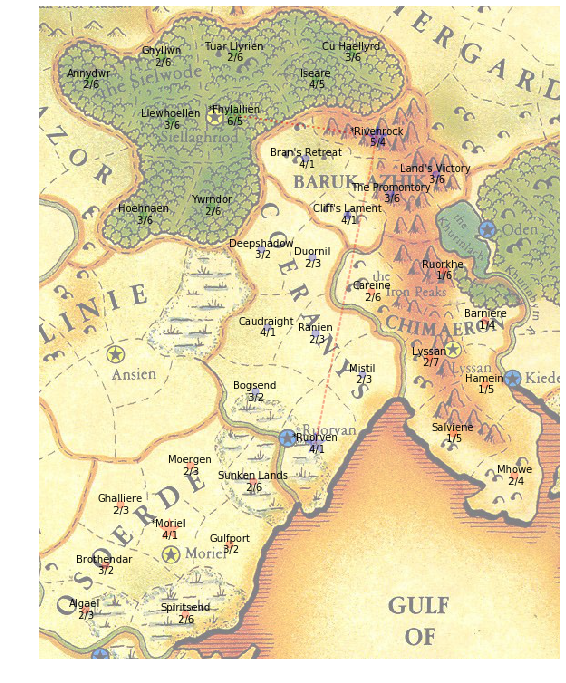

In [3]:
Game.save_world('Birthright')
Game.show_map(caravans=True, regions=['Eastern Marches'])

In [4]:
Region = 'The Heartlands'
d = 'Avanil'
Game.add_regent('DA', 'Darien Avan', Class='Fighter', Level=9, Alignment='LN', Regency_Bonus=5
                , Regency_Points=110, Gold_Bars=160
                , Attitude='Aggressive', Lieutenants=['Dheraene Bhailie'])
lst = ['Annuire', 'Avarien', 'Bherin', 'Caulnor', 'Daulton', 'Duriene', 'Nentril', 'Taliern', 'Vanilen']

p = lst[0]
Game.add_provence(p, d, Region, 'DA', Population=7, Magic=0, x=790, y=2215, Waterway=True)
Game.add_holding(p, 'DA', 'Law', 7)
Game.add_holding(p, 'WIT', 'Temple', 4)
Game.add_holding(p, 'CJS', 'Temple', 3)
Game.add_holding(p, 'PAI', 'Guild', 4)
Game.add_holding(p, 'EM', 'Guild', 2)
Game.add_holding(p, 'AV', 'Source', 0)
Game.add_holding(p, 'HK', 'Source', 0)
Game.add_geo(p, 'Caulnor', Border=1)
Game.add_geo(p, 'Daulton', Border=1)
Game.add_troops('DA', p, 'Cavalry')
p = lst[1]
Game.add_provence(p, d, Region, 'DA', Population=3, Magic=4, x=710, y=2025)
Game.add_holding(p, 'DA', 'Law', 3)
Game.add_holding(p, 'WIT', 'Temple', 3)
Game.add_holding(p, 'PAI', 'Guild', 3)
Game.add_holding(p, 'HK', 'Source', 3)
Game.add_geo(p, 'Duriene', Border=1)
Game.add_geo(p, 'Vanilen', Border=1)
Game.add_geo(p, 'Nentril', Border=1)
Game.add_troops('DA', p, 'Archers')
Game.add_troops('DA', p, 'Infantry')
Game.add_troops('DA', p, 'Knights')
p = lst[2]
Game.add_provence(p, d, Region, 'DA',  Population=4, Magic=1, x=770, y=2110)
Game.add_holding(p, 'DA', 'Law', 4)
Game.add_holding(p, 'WIT', 'Temple', 2)
Game.add_holding(p, 'CJS', 'Temple', 2)
Game.add_holding(p, 'PAI', 'Guild', 2)
Game.add_holding(p, 'EM', 'Guild', 2)
Game.add_holding(p, 'HK', 'Source', 1)
Game.add_geo(p, 'Caulnor', Border=1)
Game.add_geo(p, 'Duriene', Border=1)
Game.add_geo(p, 'Taliern', Border=1)
Game.add_geo(p, 'Daulton', Border=1)
Game.add_troops('DA', p, 'Artillerists')
Game.add_troops('DA', p, 'Elite Infantry')
Game.add_troops('DA', p, 'Knights')
p = lst[3]
Game.add_provence(p, d, Region, 'DA',  Population=5, Magic=0, x=820, y=2150) 
Game.add_holding(p, 'DA', 'Law', 5)
Game.add_holding(p, 'WIT', 'Temple', 3)
Game.add_holding(p, 'CJS', 'Temple', 2)
Game.add_holding(p, 'PAI', 'Guild', 2)
Game.add_holding(p, 'AV', 'Guild', 2)
Game.add_holding(p, 'HK', 'Source', 1)
Game.add_geo(p, 'Daulton', Border=1)
Game.add_troops('DA', p, 'Archers')
Game.add_troops('DA', p, 'Pikemen')
p = lst[4]
Game.add_provence(p, d, Region, 'DA',  Population=5, Magic=0, x=720, y=2200, Terrain='Mountains', Capital=True)
Game.add_holding(p, 'DA', 'Law', 5)
Game.add_holding(p, 'WIT', 'Temple', 2)
Game.add_holding(p, 'CJS', 'Temple', 3)
Game.add_holding(p, 'PAI', 'Guild', 3)
Game.add_holding(p, 'AV', 'Guild', 2)
Game.add_holding(p, 'HK', 'Source', 2)
Game.add_geo(p, 'Taliern', Border=1)
Game.add_troops('DA', p, 'Archers')
Game.add_troops('DA', p, 'Artillerists')
Game.add_troops('DA', p, 'Cavalry')
Game.add_troops('DA', p, 'Infantry')
Game.add_troops('DA', p, 'Infantry')
Game.add_troops('DA', p, 'Elite Infantry')
Game.add_troops('DA', p, 'Knights')
Game.add_troops('DA', p, 'Knights')
Game.add_troops('DA', p, 'Pikemen')
Game.add_troops('DA', p, 'Pikemen')
p = lst[5]
Game.add_provence(p, d, Region, 'DA',  Population=4, Magic=1, x=740, y=2070) 
Game.add_holding(p, 'DA', 'Law', 4)
Game.add_holding(p, 'WIT', 'Temple', 1)
Game.add_holding(p, 'CJS', 'Temple', 3)
Game.add_holding(p, 'PAI', 'Guild', 3)
Game.add_holding(p, 'EM', 'Guild', 1)
Game.add_holding(p, 'HK', 'Source', 1)
Game.add_geo(p, 'Taliern', Border=1)
Game.add_geo(p, 'Vanilen', Border=1)
Game.add_troops('DA', p, 'Cavalry')
Game.add_troops('DA', p, 'Elite Infantry')
Game.add_troops('DA', p, 'Pikemen')
p = lst[6]
Game.add_provence(p, d, Region, 'DA',  Population=3, Magic=4, x=670, y=2000, Terrain='Mountains') 
Game.add_holding(p, 'DA', 'Law', 3)
Game.add_holding(p, 'WIT', 'Temple', 3)
Game.add_holding(p, 'PAI', 'Guild', 3)
Game.add_holding(p, 'HK', 'Source', 4)
Game.add_geo(p, 'Vanilen', Border=1)
Game.add_troops('DA', p, 'Infantry')
p = lst[7]
Game.add_provence(p, d, Region, 'DA',  Population=3, Magic=4, x=690, y=2115, Terrain='Mountains') 
Game.add_holding(p, 'DA', 'Law', 3)
Game.add_holding(p, 'WIT', 'Temple', 3)
Game.add_holding(p, 'PAI', 'Guild', 3)
Game.add_holding(p, 'EM', 'Guild', 0)
Game.add_holding(p, 'HK', 'Source', 4)
Game.add_geo(p, 'Vanilen', Border=1)
Game.add_troops('DA', p, 'Infantry')
p = lst[8]
Game.add_provence(p, d, Region, 'DA',  Population=3, Magic=4, x=665, y=2065, Terrain='Mountains') 
Game.add_holding(p, 'DA', 'Law', 3)
Game.add_holding(p, 'WIT', 'Temple', 3)
Game.add_holding(p, 'PAI', 'Guild', 3)
Game.add_holding(p, 'HK', 'Source', 4)
Game.add_troops('DA', p, 'Infantry')



# GHOERE
Game.add_regent('GT', 'Gavin Tael', Class='Fighter', Level=9, Alignment='LE', Regency_Bonus=4
                , Regency_Points=49, Gold_Bars=38
                , Attitude='Aggressive', Lieutenants=['Johnathan Miechale'])
d = 'Ghoere'
p = 'Achiese'
Game.add_provence(p, d, Region, 'GT',  Population=4, Magic=1, x=1305, y=2100)
Game.add_geo(p, 'Brothendar', Border=1)
Game.add_geo(p, 'Ghalliere', Border=1)
Game.add_holding(p, 'GT', 'Law', 3)
Game.add_holding(p, 'HA', 'Temple', 3)
Game.add_holding(p, 'LPA', 'Temple', 1)
Game.add_holding(p, 'GH', 'Guild', 4)
Game.add_holding(p, 'SM', 'Source', 1)
p = 'Bhalaene'
Game.add_provence(p, d, Region, 'GT',  Population=6, Magic=0, x=1170, y=2085, Terrain='Hills', Capital=True, Castle=6)
Game.add_geo(p, 'Achiese', Border=1)
Game.add_holding(p, 'GT', 'Law', 4)
Game.add_holding(p, 'MOC', 'Temple', 5)
Game.add_holding(p, 'HA', 'Temple', 1)
Game.add_holding(p, 'GH', 'Guild', 4)
Game.add_holding(p, 'ML', 'Guild', 2)
Game.add_holding(p, 'SM', 'Source', 0)
for a in range(3):
    Game.add_troops('GT', p, 'Archers')
    Game.add_troops('GT', p, 'Cavalry')
    Game.add_troops('GT', p, 'Elite Infantry')
    Game.add_troops('GT', p, 'Knights')
    Game.add_troops('GT', p, 'Pikemen')
    Game.add_troops('GT', p, 'Mercenary Cavalry')
p = 'Bheline'
Game.add_provence(p, d, Region, 'GT',  Population=4, Magic=1, x=1140, y=2170)
Game.add_geo(p, 'Bhalaene', Border=1)
Game.add_holding(p, 'GT', 'Law', 4)
Game.add_holding(p, 'MOC', 'Temple', 3)
Game.add_holding(p, 'HA', 'Temple', 1)
Game.add_holding(p, 'GH', 'Guild', 4)
Game.add_holding(p, 'SM', 'Source', 1)
p = 'Conallier'
Game.add_provence(p, d, Region, 'GT',  Population=2, Magic=3, x=1200, y=1970)
Game.add_holding(p, 'GT', 'Law', 2)
Game.add_holding(p, 'Mh', 'Law', 0)
Game.add_holding(p, 'MOC', 'Temple', 0)
Game.add_holding(p, 'LPA', 'Temple', 2)
Game.add_holding(p, 'ML', 'Guild', 2)
Game.add_holding(p, 'SM', 'Source', 3)
p = 'Danaroene'
Game.add_provence(p, d, Region, 'GT',  Population=4, Magic=1, x=1220, y=2160)
Game.add_geo(p, 'Bheline', Border=1)
Game.add_geo(p, 'Achiese', Border=1)
Game.add_geo(p, 'Bhalaene', Border=1)
Game.add_holding(p, 'GT', 'Law', 3)
Game.add_holding(p, 'MOC', 'Temple', 3)
Game.add_holding(p, 'HA', 'Temple', 1)
Game.add_holding(p, 'GH', 'Guild', 2)
Game.add_holding(p, 'SM', 'Source', 1)
p = 'Ghiere'
Game.add_provence(p, d, Region, 'GT',  Population=5, Magic=0, x=1030, y=2060)
Game.add_holding(p, 'GT', 'Law', 3)
Game.add_holding(p, 'Mh', 'Law', 2)
Game.add_holding(p, 'MOC', 'Temple', 2)
Game.add_holding(p, 'HA', 'Temple', 3)
Game.add_holding(p, 'GH', 'Guild', 3)
Game.add_holding(p, 'GK', 'Guild', 2)
Game.add_holding(p, 'SM', 'Source', 0)
p = 'Rhumannen'
Game.add_provence(p, d, Region, 'GT',  Population=4, Magic=1, x=1055, y=2095, Terrain='Hills')
Game.add_geo(p, 'Bhalaene', Border=1)
Game.add_geo(p, 'Bheline', Border=1)
Game.add_geo(p, 'Ghiere', Border=1)
Game.add_holding(p, 'GT', 'Law', 2)
Game.add_holding(p, 'Mh', 'Law', 2)
Game.add_holding(p, 'MOC', 'Temple', 2)
Game.add_holding(p, 'HA', 'Temple', 2)
Game.add_holding(p, 'GH', 'Guild', 3)
Game.add_holding(p, 'GK', 'Guild', 1)
Game.add_holding(p, 'SM', 'Source', 1)
p = 'Thoralinar'
Game.add_provence(p, d, Region, 'GT',  Population=3, Magic=2, x=1230, y=2030, Terrain='Hills')
Game.add_geo(p, 'Bhalaene', Border=1)
Game.add_geo(p, 'Achiese', Border=1)
Game.add_geo(p, 'Conallier', Border=1)
Game.add_holding(p, 'GT', 'Law', 3)
Game.add_holding(p, 'LPA', 'Temple', 3)
Game.add_holding(p, 'GH', 'Guild', 3)
Game.add_holding(p, 'SM', 'Source', 2)
p = 'Tireste'
Game.add_provence(p, d, Region, 'GT',  Population=5, Magic=0, x=980, y=2110)
Game.add_geo(p, 'Rhumannen', Border=1)
Game.add_geo(p, 'Ghiere', Border=1)
Game.add_holding(p, 'GT', 'Law', 5)
Game.add_holding(p, 'MOC', 'Temple', 2)
Game.add_holding(p, 'HA', 'Temple', 3)
Game.add_holding(p, 'GH', 'Guild', 1)
Game.add_holding(p, 'GK', 'Guild', 4)
Game.add_holding(p, 'SM', 'Source', 0)
p = 'Tornilen'
Game.add_provence(p, d, Region, 'GT',  Population=3, Magic=2, x=1130, y=2045)
Game.add_geo(p, 'Conallier', Border=1)
Game.add_geo(p, 'Thoralinar', Border=1)
Game.add_geo(p, 'Bhalaene', Border=1)
Game.add_geo(p, 'Rhumannen', Border=1)
Game.add_geo(p, 'Ghiere', Border=1)
Game.add_holding(p, 'GT', 'Law', 2)
Game.add_holding(p, 'Mh', 'Law', 0)
Game.add_holding(p, 'MOC', 'Temple', 3)
Game.add_holding(p, 'HA', 'Temple', 0)
Game.add_holding(p, 'GH', 'Guild', 2)
Game.add_holding(p, 'ML', 'Guild', 0)
Game.add_holding(p, 'SM', 'Source', 2)


Game.add_regent('WIT', 'Western Imperial Temple of Haelyn (Rhobber Nichaleir)', Archetype='Priest')
Game.add_regent('CJS', 'Celestial Jewel of Sarimie (Temais Coumain)', Archetype='Priest')
Game.add_regent('PAI', "Parnien Anuvier Iniere (Prince's Pride)", Archetype='Bandit', Regency_Bonus=1)
Game.add_regent('EM', "Rriene Mierelen (Brosen Royal Guild)")
Game.add_regent('AV', "Arron Vaumel (Straits of Aerele Shipping)", Archetype='Mage')
Game.add_regent('HK', "Harald Khorien", Archetype='Mage')
Game.add_regent('WIT', 'Western Imperial Temple of Haelyn (Rhobber Nichaleir)', Archetype='Priest')
Game.add_regent('CJS', 'Celestial Jewel of Sarimie (Temais Coumain)', Archetype='Priest')
Game.add_regent('PAI', "Parnien Anuvier Iniere (Prince's Pride)", Archetype='Bandit', Regency_Bonus=1)
Game.add_regent('EM', "Rriene Mierelen (Brosen Royal Guild)")
Game.add_regent('AV', "Arron Vaumel (Straits of Aerele Shipping)", Archetype='Mage')
Game.add_regent('HK', "Harald Khorien", Archetype='Mage')
Game.add_regent('SM', "Sword Mage", Archetype='Archmage', Regency_Bonus=3, Alignment='LE')
Game.add_regent('MOC', "Militant Order of Cuiraecen (Fhylie the Sword)", Archetype='Priest')
Game.add_regent('Mh', "Mhor (Mhoried)")
Game.add_regent('GK', "Guilder Kalien (Endier, Heartlanders Outfitters)")

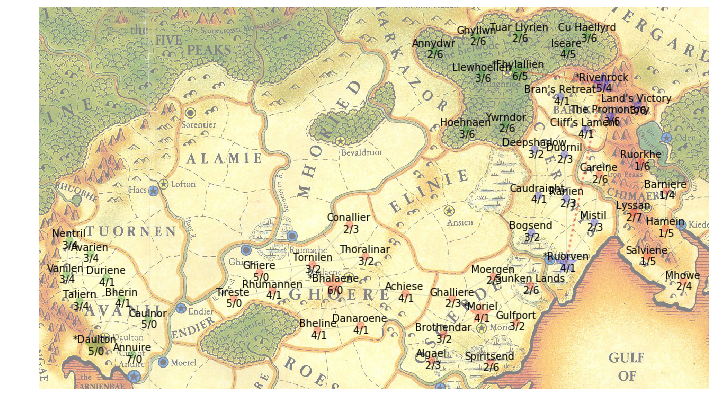

In [21]:
Game.show_map(caravans=True, borders=True)

In [6]:
Game.Regents[Game.Regents['Regent'] == 'GK']

,Regent,Full Name,Player,Class,Level,Alignment,Race,Str,Dex,Con,...,Wis,Cha,Insight,Deception,Persuasion,Regency Points,Gold Bars,Regency Bonus,Attitude,Alive
28,GK,"Guilder Kalien (Endier, Heartlanders Outfitters)",False,Noble,2,NN,Human,0,1,0,...,2,3,4,5,5,0,0,1,Normal,True


In [7]:
Game.Provences[Game.Provences['Domain'] == 'Osoerde']

,Provence,Domain,Region,Regent,Terrain,Loyalty,Taxation,Population,Magic,Castle,Capital,Position,Contested,Waterway,Brigands
7,Algael,Osoerde,Eastern Marches,JR,Swamp,Average,Moderate,2,3,0,False,"[1355, 2226]",False,False,False
8,Brothendar,Osoerde,Eastern Marches,JR,Plains,Average,Moderate,3,2,0,False,"[1377, 2177]",False,False,False
9,Ghalliere,Osoerde,Eastern Marches,JR,Plains,Average,Moderate,2,3,0,False,"[1394, 2110]",False,False,False
10,Gulfport,Osoerde,Eastern Marches,JR,Plains,Average,Moderate,3,2,0,False,"[1515, 2154]",False,True,False
11,Moergen,Osoerde,Eastern Marches,JR,Plains,Average,Moderate,2,3,0,False,"[1471, 2067]",False,False,False
12,Moriel,Osoerde,Eastern Marches,JR,Plains,Average,Moderate,4,1,0,True,"[1448, 2138]",False,False,False
13,Spiritsend,Osoerde,Eastern Marches,JR,Swamp,Average,Moderate,2,6,0,False,"[1466, 2231]",False,True,False
14,Sunken Lands,Osoerde,Eastern Marches,JR,Swamp,Average,Moderate,2,6,0,False,"[1541, 2085]",False,True,False


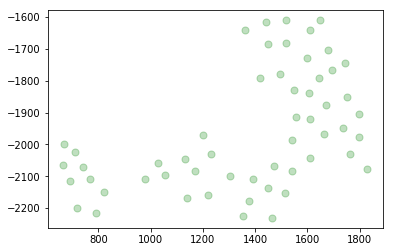

In [31]:
import networkx as nx
import numpy as np
Provences = Game.Provences
t = Game.Geography.copy()
t = t[t['Neighbor'] != 'Shieldhaven']
t = t[t['Provence'] != 'Shieldhaven']
G = nx.from_pandas_edgelist(t, 'Provence', 'Neighbor', ['Border'])
for pro in list(Provences['Provence']):
    x =  Provences[Provences['Provence']==pro]['Position'].values[0][0]
    y =  Provences[Provences['Provence']==pro]['Position'].values[0][1]
    pos[pro] = Provences[Provences['Provence']==pro]['Position'].values[0]*np.array([1,-1])
    
nx.draw_networkx_nodes(G,
                               pos,
                               nodes = list(Provences['Provence']), 
                               node_color='g',
                               node_size=50,
                               alpha=0.25)    

In [34]:
def girvan_newman_step(G):
    """Run one step of the Girvan-Newman community detection algorithm.
    Afterwards, the graph will have one more connected component.
    Parameters
    function GirvanNewman:
    repeat:
        repeat until a new connected component is created:
            calculate the edge betweenness centralities for all the edges
            remove the edge with the highest betweenness
    ----------
    G: networkx Graph object
    Returns
    -------
    None
    """
    n_coms = nx.number_connected_components(G)
    n_init = n_coms
    while n_init == n_coms:
        ebc = nx.edge_betweenness_centrality(G)
        G.remove_edge(*max(ebc, key=ebc.get))
        n_coms = nx.number_connected_components(G)


def find_communities_n(G, n):
    """Return communites of G after running Girvan-Newman algorithm n steps.
    Parameters
    ----------
    G: networkx Graph object
    n: int
    Returns
    -------
    list of lists
    """
    G1 = G.copy()
    for i in range(n):
        girvan_newman_step(G1)
    return list(nx.connected_components(G1))

In [37]:
len(find_communities_n(G,0))

2

In [38]:
Game.LeyLines

,Regent,Provence,Other


In [40]:
len(list(nx.connected_components(G)))

2